In [ ]:
import numpy as np
from paths.paths import get_multiple_paths, join_paths, path_is_file
import os
from pathlib import Path
from glob import glob
import shutil



In [ ]:
uservec = np.arange(40)
taskvec = np.arange(5)+1
recvec = np.arange(8)+1


# Frame Time
dT = 40

reppath = f'AETS_{dT}ms/'



#### PATHS ####
frames_dir, clips_dir = get_multiple_paths(levels=(('datasets', 'python', 'OG'), ('datasets', 'python', 'PP'))) # Original Frames to PreProcessed Frames

print(uservec)
print(taskvec)
print(recvec)
# for userno in uservec:
#     for taskno in taskvec:
#         for recno in recvec-1:
#             # print(join_paths(clips_dir, reppath, f'user{userno:03d}_task{taskvec[taskno]:02d}_rec{recvec[recno]:02d}.npy'))
#             print(taskno)
#             pass

In [ ]:
basename = f'user000_task01_rec01'

dir_ = join_paths(frames_dir, reppath)
# print(dir_)
# print(sorted(os.listdir(dir_))[:1])
# counter = 0
# for f in sorted(os.listdir(dir_)) :
#     # print(join_paths(dir_, f))
#     # print(f)
#     # print(f[:20])
#     # print(basename)
#     if path_is_file(join_paths(dir_, f)) and f[:20] == basename:
#         counter+=1
    
files = [f for f in sorted(os.listdir(join_paths(frames_dir, reppath))) if path_is_file(join_paths(frames_dir, reppath, f)) and f[:20] == basename]


print(len(sorted(os.listdir(join_paths(frames_dir, reppath)))))
print(len(files))
# counter = 0

print(len(glob(join_paths(frames_dir, reppath, 'user000_task01_rec01*' ))))
            
# for f in sorted(os.listdir(join_paths(frames_dir, reppath))) :
#     print(f)
#     print(Path(join_paths(frames_dir, reppath, f)).name)
#     print(basename)
#     print(f[:20])
#     print()
#     if path_is_file(join_paths(frames_dir, reppath, f)) and f == basename:
#         pass
#     break

In [ ]:
old = '/home/andregraca/NebFIR/FinalDataset'
new = ''

In [ ]:
import numpy as np

size=10000
np.random.seed(0)
events = np.hstack( (np.arange(size).reshape(size,1), np.random.randint(0,600, size).reshape(size,1), np.random.randint(0,600, size ).reshape(size,1), np.random.randint(0,2, size ).reshape(size,1) ) ) # 4 cols for [timestamp, x ,y, polarity]
print(events.shape)
print(events[:10])
    

In [ ]:
events[ events[..., 3]==1 ][:10]

In [ ]:
import cv2
import os
from pathlib import Path
import matplotlib.pyplot as plt
import time
from tqdm import tqdm


data_path='DATA/'

def save_gray_deepfakes(folder: int='deepfakes_v3', p=1, s=1):
  video_path = os.path.join(data_path, f'videos/{folder}/p{p}/s{s}/video.avi')
  save_path = os.path.join(data_path, f'images/{folder}/p{p}/s{s}/')
  
  if not os.path.isdir(save_path):
    os.makedirs(save_path)
    
  if len(os.listdir(save_path)) > 0:
    return
  
  cap = cv2.VideoCapture(video_path)

  # Check if camera opened successfully
  if (cap.isOpened() == False): 
    raise RuntimeError("Error opening video stream or file")
    
    
  counter=0
  while cap.isOpened():
      ret, frame = cap.read()
      if ret == True:
          img_name=os.path.join(save_path, f'frame_{counter:0>3}.png')        
          cv2.imwrite(img_name, frame)
          
          counter+=1
      else:
          break
  else: 
      print('closed cap')

  print('Frames: '+ str(counter)+ f', Participant: {p}'+f', Sequence: {s}')
  cap.release()


for p in tqdm(range(1,10+1), desc='Participant', bar_format='{desc} |{bar}|{n_fmt}/{total_fmt} [{elapsed}<{remaining}, {postfix}]'):
  for s in range(1,10+1):
    save_gray_deepfakes(folder='deepfakes_v3', p=p, s=s)


In [ ]:
500/24

In [ ]:
import h5py
import numpy as np
import pandas as pd

np.random.seed(0)

dataset_file='/home/andregraca/NebFIR/DATA/DatasetsFinal/AETS_40ms/'+f'DATASET{3}_Dur500ms_AETS_40ms.h5'
train_list_file="/home/andregraca/NebFIR/DATA/lists/"+'mix_list_stride1_f01_u10_r56789.csv'
df = pd.read_csv(train_list_file)
# train_idxs = np.load(train_list_file)
train_len = len(df)
print(train_len)
        

BATCH_SIZE = 12
triplet_classes_num = 3
labels_per_batch = BATCH_SIZE//triplet_classes_num

with h5py.File(dataset_file, mode='r') as dataset:
    print(list(dataset.keys()))
    print(dataset['user'].shape)
    
    x = df.Index.value_counts().sort_index().sum() 
    x0 = (df.user.value_counts() % (BATCH_SIZE//triplet_classes_num) ).sort_index()
    
    # print(df[df.user==0])
    # print(df)
    # print(x)
    # print(x0)
    # print(df.value_counts().sort_index())
    
    # print(df.iat[0, 0])
    
    # print(x//12  , x%12)
    
    remaining_labels = x0[x0 > 0]
    # print((remaining_labels))
    # print(list(remaining_labels.index))
    # print(remaining_labels.count())
    # new_total = (train_len + (labels_per_batch-remaining_labels).sum()) // labels_per_batch
    # print(new_total)
    for i in list(range(remaining_labels.count())) :
        # print(x_0.iat[i])
        # print(labels_per_batch-x_0.iat[i])
        # print(df[df.user==i].dropna().Index)
        # print(remaining_labels.index[i])
        
        rem_user = remaining_labels.index[i]
        last_idxs = (np.random.choice(a=df[df.user==rem_user].dropna().Index.to_numpy() , size=labels_per_batch-remaining_labels.iat[i], replace=False) )
        # group = df.groupby(df.user).get_group(rem_user)
        group = df[df.user==rem_user]
        last_user_idxs = list( range(list(group.Index[::labels_per_batch])[-1], list(group.Index[-1:])[0] +1) ) + sorted(last_idxs)
        # print('user',rem_user , last_user_idxs )
        
        
        last_available_idx = (group.Index[-1:]).index[0]+1
        # # last_available_idx = list(group.Index[-1:])
        # # print((group.Index[-1:].index[0]+1))
        # # print(group.Index[-1:])
        # # print(list( range( list(group.Index[-1:])[0]+1, list(group.Index[-1:])[0]+1+labels_per_batch-remaining_labels.iat[i] )))
        # # print(df.iloc[last_available_idx].folder)
        # # print(df.iloc[last_available_idx].recording)
        # # break
        # # if i <2:
        # #     continue
        # print(df[df.user==i])
        # print(sorted(last_idxs))
        # # # print(last_available_idx)
        # df_ = [df[df.Index == li] for li in sorted(last_idxs) ]
        # print(df_[0].folder )
        # print([df_[li].folder for li, _ in enumerate(last_idxs) ])
        # print([df[df.Index == li].recording.to_numpy()[0] for li in sorted(last_idxs) ])
        # print([rem_user]*len(sorted(last_idxs)))
        # # raise
        # # print([df.iloc[li].recording for li in sorted(last_idxs)])
        line = pd.DataFrame(data={  "Index":  sorted(last_idxs),
                                    'folder':[df[df.Index == li].folder.to_numpy()[0] for li in sorted(last_idxs) ] ,
                                    'recording':[df[df.Index == li].recording.to_numpy()[0] for li in sorted(last_idxs) ] ,
                                    'user': [rem_user]*len(sorted(last_idxs))}, 
                            index=list( range( list(group.Index[-1:])[0]+1, list(group.Index[-1:])[0]+1+ labels_per_batch-remaining_labels.iat[i] ) ))
        df = pd.concat([df.iloc[:last_available_idx], line, df.iloc[last_available_idx:]]).reset_index(drop=True)
        
        # # print(df)
        # # print('all', list(group.Index[-1:])[0] - list(group.Index[::labels_per_batch])[-1] )
        # # print('last', (sorted(last_idxs)))
        # # print(dataset['folder'][sorted(last_idxs)])
        # # new_list = 
        # # break
    # print(df[df.user==0])
    # # print(df)
    # # print('all', group.Index[::labels_per_batch])
    # # print(df[df.user==0].Index[::labels_per_batch])
    # # print(df[df.user==5].tail(5))

    new_total=df.shape[0]
    # # print(new_total)
    new_idxs = np.arange(new_total, step=labels_per_batch)
    np.random.shuffle(new_idxs)
    full_new_idxs = []
    for idx in new_idxs:
        full_new_idxs.extend(list(range(idx, idx+labels_per_batch)) )
    # # print(full_new_idxs)
    
    df1=df.reindex(full_new_idxs)
    # print(df1[df1.user==0])
    
    # print(df1.head(25))

    new_list = None
    # print('Done')

# users = dataset['user'][list(sorted(train_idxs))]
# print(users)


In [ ]:
import h5py
import numpy as np
import pandas as pd

# np.random.seed(0)

dataset_file='/home/andregraca/NebFIR/DATA/DatasetsFinal/AETS_40ms/'+f'DATASET{999}_Dur500ms_AETS_40ms.h5'
train_list_file="/home/andregraca/NebFIR/DATA/lists/"+'list_ds4_deepfakes_v3_r01234.csv'
# train_list_file="/home/andregraca/NebFIR/DATA/lists/"+'mix_list_stride1_f01_u10_r56789.csv'
df = pd.read_csv(train_list_file)
# train_idxs = np.load(train_list_file)
train_len = len(df)
print(train_len)
        

BATCH_SIZE = 30
triplet_classes_num = 3
labels_per_batch = BATCH_SIZE//triplet_classes_num
print(labels_per_batch)

with h5py.File(dataset_file, mode='r') as dataset:
    # print(list(dataset.keys()))
    # print(dataset['user'].shape)
    
    x = df.Index.value_counts().sort_index().sum() 
    x0 = (df.user.value_counts() % (BATCH_SIZE//triplet_classes_num) ).sort_index()
    
    
    remaining_labels = x0[x0 > 0]
    for i in list(range(remaining_labels.count())) :
        
        rem_user = remaining_labels.index[i]
        last_idxs = (np.random.choice(a=df[df.user==rem_user].dropna().Index.to_numpy() , size=labels_per_batch-remaining_labels.iat[i], replace=False) )

        group = df[df.user==rem_user]
        last_user_idxs = list( range(list(group.Index[::labels_per_batch])[-1], list(group.Index[-1:])[0] +1) ) + sorted(last_idxs)
        
        last_available_idx = (group.Index[-1:]).index[0]+1
        
        line = pd.DataFrame(data={  "Index":  sorted(last_idxs),
                                    'folder':[df[df.Index == li].folder.to_numpy()[0] for li in sorted(last_idxs) ] ,
                                    'recording':[df[df.Index == li].recording.to_numpy()[0] for li in sorted(last_idxs) ] ,
                                    'user': [rem_user]*len(sorted(last_idxs))}, 
                            index=list( range( list(group.Index[-1:])[0]+1, list(group.Index[-1:])[0]+1+ labels_per_batch-remaining_labels.iat[i] ) ))
        df = pd.concat([df.iloc[:last_available_idx], line, df.iloc[last_available_idx:]]).reset_index(drop=True)
        

    new_total=df.shape[0]
    print(new_total)




    split_dfs = [df[df.user == u].reset_index(drop=True) for u in df.user.unique()]

    print([sp.shape for sp in split_dfs])
    
    result = pd.DataFrame()
    old_idx = None
    for i in range(0, new_total, labels_per_batch):
        frames = [split.loc[i:i+labels_per_batch-1, split.columns] for split in split_dfs]
        
        idx = np.random.choice(np.arange(len(split_dfs)), len(split_dfs), replace=False)
        while old_idx is not None :
            idx = np.random.choice(np.arange(len(split_dfs)), len(split_dfs), replace=False) 
            # print(old_idx[-3:], idx[:3])  
            if all(old_idx[-3:] != idx[:3]):
                break
        old_idx = idx 
        frames = [frames[i] for i in idx]
        
        frames.insert(0, result)
        result = pd.concat(frames, ignore_index=True)
            

    df1=result
    
    print(df1)
    # print(df1.tail(60))
    # print('Index: ', df1.iloc[0].Index)
    # print('user: ', df1.iloc[0].user)
    # print('recording: ', df1.iloc[0].recording)
    # print('folder: ', df1.iloc[0].folder)
    # print('user: ', dataset['user'][df1.iloc[0].Index])
    # print('recording: ', dataset['recording'][df1.iloc[0].Index])
    # print('folder: ', dataset['folder'][df1.iloc[0].Index])
    # print('labels: ', dataset['labels'][df1.iloc[0].Index])
    
    
    # print(df1.Index.to_numpy())



In [ ]:
import torch

batchsize=30
labels=10

index = torch.tensor([[0, 1, 2, 10]])

# torch.scatter()
index = torch.Tensor([[1],
        [0],
        [9],
        [9],
        [0],
        [1],
        [1],
        [9],
        [9],
        [0],
        [9],
        [9],
        [0],
        [9],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [9],
        [1],
        [9],
        [0],
        [1],
        [0],
        [0],
        [1],
        [9]]).type(dtype=torch.int64)

# print(index)
# index = index.squeeze().unsqueeze(0)
# index = torch.tensor([[0, 1, 2, 0]])
# print(index)
mtx = torch.zeros(batchsize, labels, dtype=torch.int64)
# print(mtx)
mtx.scatter_(1, index, 1)

In [ ]:
# Example of target with class indices
import torch.nn as nn
import torch

loss = nn.CrossEntropyLoss()
input_ = torch.randn(3, 10, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(10)
output = loss(input_, target)

print(input_)
print(target)
print(output)
# output.backward()

In [ ]:
a = torch.Tensor([[0,0,0,1,0,0],[0,1,0,0,0,0],[0,0,0,0,1,0]])
torch.max(a, 1).indices


In [ ]:
a = [0,1,2,3,4]
a.insert(0, 9)
print(a)

In [ ]:
print(labels_per_batch)
split_dfs = [df[df.user == u].reset_index(drop=True) for u in df.user.unique()]

result = pd.DataFrame()
for i in range(0, split_dfs[0].shape[0], labels_per_batch):
    frames = [split.loc[i:i+labels_per_batch-1, split.columns] for split in split_dfs]
    frames.insert(0, result)
    result = pd.concat(frames, ignore_index=True)
          
print(result)

In [ ]:
df.user.unique()

split_dfs = [df[df.user == u] for u in df.user.unique()]
print([sp.shape for sp in split_dfs])
    

In [ ]:
train_len, train_len//BATCH_SIZE*BATCH_SIZE, train_len%BATCH_SIZE

In [ ]:
a=np.arange(train_len)
np.random.shuffle(a)
a

In [ ]:
np.random.shuffle(np.arange(330))

In [ ]:
import torch.nn as nn
import torch

torch.manual_seed(0)

triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2)
anchor = torch.randn(100, 128, requires_grad=True)
positive = torch.randn(100, 128, requires_grad=True)
negative = torch.randn(100, 128, requires_grad=True)
print(anchor, positive, negative)
output = triplet_loss(anchor, positive, negative)
print(output)
output.backward()


In [ ]:
from glob import glob
import os
from pathlib import Path
from tqdm import tqdm
from utils import key_sort_by_numbers
import numpy as np

# print((sorted(glob( '/home/andregraca/DATA/DatasetsClips/deepfakes_v1/grayscale/**/*' ,recursive=True))))
arrs = sorted(glob( '/home/andregraca/DATA/DatasetsClips/deepfakes_v1/grayscale/**/*' ,recursive=True))
arrays = [np.load(arr).shape for arr in tqdm(arrs)] 
# arrays_shape = [arr.shape for arr in arrays]
# print((sorted(glob( '/home/andregraca/DATA/videos/deepfakes_v1/**/video.avi' ,recursive=True), key=key_sort_by_numbers)))
# print(sorted(glob( '/home/andregraca/DATA/videos/deepfakes_v1/**/video.avi' ,recursive=True), key=key_sort_by_numbers()))

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
from pathlib import Path
from ipywidgets import widgets
from utils import key_sort_by_numbers, get_val_from_string
from IPython.display import clear_output, display
from experiments.experiments import get_exp_opts

import matplotlib.pyplot as plt


global SMOOTH
SMOOTH = 15

out = widgets.Output()

@out.capture()
def get_samples(change, *args):
    if change['type'] == 'change' and change['name'] == 'value':
        pass
    else:
        return
    
    clear_output()
    
    model_log_file = change['new']
    exp = get_val_from_string(model_log_file, keyword='EXP', val_length=3)
        
    # READ LOG FILE
    df = pd.read_csv(model_log_file)
    epochs = df[df.part=='part'].count().part.astype(int)
    df.drop(df[df.part=='part'].index, axis=0, inplace=True)

    train_samples = df[df.part == 'train']
    validation_samples = df[df.part == 'val']

    print('EXPERIMENT:', exp)
    print('Path:', Path(model_log_file).name)
    print('Train size: ', train_samples.shape[0], '\nValidation size: ', validation_samples.shape[0])
    print('Epochs:', epochs)

    # GET DATASET SHAPE TO REPRESENT DIFFERENT SIZED TRAIN AND VALIDATION SIZES
    dataset_length_t = (pd.read_csv('DATA/lists/'+get_exp_opts(int(exp)).get('lists').get('train'))).shape[0]
    dataset_length_v = (pd.read_csv('DATA/lists/'+get_exp_opts(int(exp)).get('lists').get('test'))).shape[0]
    BATCH_SIZE = get_exp_opts(int(exp)).get('trainer').get('batch_size')
        
    
    counterPerEpoch_t = np.ceil(dataset_length_t/BATCH_SIZE)
    counterPerEpoch_v = np.ceil(dataset_length_v/BATCH_SIZE)

    times_t = np.arange(train_samples.shape[0])/counterPerEpoch_t
    times_v = np.arange(validation_samples.shape[0])/counterPerEpoch_v


    def smooth(y, box_pts):
        box = np.ones(box_pts)/box_pts
        y_smooth = np.convolve(y, box, mode='same')
        return y_smooth

    
    global SMOOTH

    plt.figure(figsize=(10,10))
    plt.plot(times_t, smooth(train_samples.acc.astype(float), SMOOTH), label='Train')#, color='orange')
    plt.plot(times_v, smooth(validation_samples.acc.astype(float), SMOOTH), label='Validation')#, color='green')
    plt.plot([0, epochs] , [.5, .5], color='black')
    plt.ylim([-.1, 1.1])
    plt.xlim(left=0, right=epochs)
    plt.legend()
    
    plt.show()





options = sorted(glob('/home/andregraca/NebFIR/data/out/model_logs/model_EXP*.txt'), key=lambda x: int(x[x.index('EXP')+3:x.index('EXP')+6].strip('_')))

dropdown = widgets.Dropdown(
    options=options,
    value=options[0],
    description='Models',
    disabled=False,
)
dropdown.observe(get_samples)

slider = widgets.IntSlider(value=SMOOTH, min=1, max=30, step=1)
def update_smooth(*args):
    global SMOOTH
    SMOOTH = slider.value
slider.observe(update_smooth)

    
display(dropdown, slider, out)


In [ ]:
import yaml

# treino e teste em grayscale de deepfakes_v1 de todos os users 76 : dataloader, i3d
model_opts = {  
                "userno": 76,
                "trainer": {"epochs": 40, "batch_size": 32, "type": "base_dataloader", "loss": "ce"},
                "data": {"dT": 40, "subclipT": 500, "stride": 40, "type": "grayscale", "extraction_method": "original"},
                "lists": {
                    "train": "train_grayscale_test-split50_S40_Fdeepfakes_v1_U0--75_R0--75.csv",
                    "test": "test_grayscale_test-split50_S40_Fdeepfakes_v1_U0--75_R0--75.csv"
                },
            }
    
with open('experiments/configs/config-1.yml', 'w') as yfile:
    yaml.safe_dump(model_opts, yfile, sort_keys=False)
    
with open('experiments/configs/config-1.yml', 'r') as yfile:
    print(yaml.safe_load(yfile))
    

In [ ]:
from experiments.configurations import Configurations as Confs

# Confs.print_all(Confs.get_all())

conf = Confs.get_config('config-1')
Confs.print_config(conf)

In [ ]:
from pathlib import Path
import os
import json
import yaml

from experiments.experiments import get_multi_exp_opts

with open('experiments/EXPERIMENTS.json') as f:
    exps = json.load(f)
    
# print(exps.keys())
for k, exp in exps.items():
    file= f'config-{k}.yml'
    with open(f'experiments/configs/{file}', 'w') as yfile:
        yaml.safe_dump(exp, yfile, sort_keys=False)
    



In [144]:
import numpy as np
from enum import Enum
np.random.seed(0)




class FrameType(Enum):
    events = 'AETS_40ms'
    grayscale = 'grayscale'

folders_names={'s3dfm', 'deepfakes_v1', 'deepfakes_v2', 'deepfakes_v3'}



userno=30
recno=10
fakerecno = userno

fakeno=20
max_user=30

print('userno: ',userno)
print('recno: ',recno)
print('fakerecno: ',fakerecno)
print('fakeno: ',fakeno)
print('max_user: ',max_user)
print()

real_users = np.ones((userno,recno), dtype=int) * np.arange(recno)
# fake_users = np.random.randint(0,max_user, size=(userno,fakeno), dtype=int) #np.arange(15) # NO UNIQUE VALUES FOR EACH USER

fake_users_train = np.array( [np.random.choice(list(set(range(max_user))-set([u])) , fakeno, replace=False) for u in range(userno)] ) # Random choice fake user * fakeno  for each real user for train

# fake_users_train = np.array( [np.random.choice(list(set(range(max_user))-set([u])) , fakeno-1, replace=False) for u in range(userno)] ) # Random choice fake user * fakeno  for each real user for train
# fake_users_train = np.concatenate( (np.arange(userno).reshape(userno,-1), fake_users_train), axis=1)

# assert len (np.unique( fake_users_train.flatten() ) ) == userno, 'Missing users appearance in fake samples'
assert all([len(set(users)) == fakeno for users in fake_users_train]), f'Users are not unique! {[f"fake users number:{len(set(users))}; fakeno:{fakeno}" for users in fake_users_train]}'

fake_users_diff = [np.setdiff1d(*arrs) for arrs in zip(np.ones((userno, fakerecno), dtype=int)*np.arange(fakerecno), fake_users_train)] # Difference between all fake users and train fake users = test fake users
fake_users_test = np.array([fake_users_diff[u] for u in range(userno)]) # Remove real user from test fake user
# fake_users_test = np.array([list(set(fake_users_diff[u])-set([u])) for u in range(userno)]) # Remove real user from test fake user



print('user', '| user recordings', '| fake users train', '| fake users test')
for i in range(userno):
    print(i, real_users[i], fake_users_train[i], fake_users_test[i])
    break


userno:  30
recno:  10
fakerecno:  30
fakeno:  20
max_user:  30

user | user recordings | fake users train | fake users test
0 [0 1 2 3 4 5 6 7 8 9] [ 3 21 24 14 12 26 28 27  6 15  9 17 23 18  2 11 29  7  5 19] [ 0  1  4  8 10 13 16 20 22 25]


In [140]:
frame_type = FrameType.grayscale
train_split_frac=.7
print('frame_type: ', frame_type)
print('train_split_frac: ', train_split_frac)


import pandas as pd

df = pd.read_csv(f'full_df_{frame_type.name}.csv', sep=';')
print('df shape: ', df.shape)



## TRAIN TEST SPLIT
df_train = df.groupby(['path','rec','user']).sample(frac=train_split_frac, replace=False, random_state=0)#.sort_values(by=['path','user', 'rec'], ascending=True)

df_train.sort_values(by=['user', 'rec', 'path', 'frameno_list'], ascending=True, inplace=True)
df_test = df.drop(df_train.index)
df_test.sort_values(by=['user', 'rec', 'path', 'frameno_list'], ascending=True, inplace=True)


print('df_train shape: ', df_train.shape)
print('df_test shape: ', df_test.shape)

frame_type:  FrameType.grayscale
train_split_frac:  0.7
df shape:  (85570, 5)
df_train shape:  (59254, 5)
df_test shape:  (26316, 5)


In [145]:
import pandas as pd

# user=0
train_df = pd.DataFrame(columns=df.columns)
test_df = pd.DataFrame(columns=df.columns)

def append_samples2df(samples, df):
    return pd.concat([df, samples], ignore_index=True)
    

for dynamic in range(userno):
    # TRAIN
    train_samples = df_train[ (df_train['folder']=='s3dfm') & (df_train['user']==dynamic) & (df_train['rec'].isin(real_users[dynamic])) ]
    train_df = append_samples2df(train_samples, train_df)
    # print(train_samples.shape)
    
    # train_samples = df_train[ (df_train['folder']=='deepfakes_v1') & (df_train['rec']==dynamic)  & (df_train['user'].isin(list(range(userno))))] # aparencia dos fakes e dinamica do user
    # # train_samples = df_train[ (df_train['folder']=='deepfakes_v1') & (df_train['user'].isin( fake_users_train[dynamic]) ) & (df_train['rec']==dynamic) ] # aparencia dos fakes e dinamica do user
    train_samples = df_train[ (df_train['folder']=='deepfakes_v1') & (df_train['rec']==dynamic) & (df_train['user'].isin(fake_users_train[dynamic])) ]
    train_df = append_samples2df(train_samples, train_df)
    
    # print(train_samples)
    
    ## TEST
    # test_samples = df_test[ (df_test['folder']=='deepfakes_v1') & (df_test['rec']==dynamic) & (df_test['user'].isin(list(range(userno)))) ]
    
    # test_samples = df_test[(df_test['user']==dynamic) & (df_test['folder']=='deepfakes_v1') & (df_test['rec'].isin(fake_users_test[dynamic]))]
    test_samples = df_test[ (df_test['user']==dynamic) & (df_test['rec'].isin( list(range(userno)) ) ) & (df_test['folder']=='deepfakes_v1')] # ALL FAKES
    # test_samples = df_test[ (df_test['user']==dynamic) & (df_test['rec'].isin( list(range(userno)) ) ) ] # ALL
    test_df = append_samples2df(test_samples, test_df)
    

print('train_df shape: ', train_df.shape)
print('test_df shape: ', test_df.shape)
df__ = train_df
df__.sort_values(by=['user', 'rec', 'folder' ])

print('unique rec shape:' , df__['rec'].unique().shape)
print('unique user shape:' , df__['user'].unique().shape)
print('unique folder shape:' , df__['folder'].unique().shape)
print('unique frameno_list shape:' , df__['frameno_list'].unique().shape)
print('unique path shape:' , df__['path'].unique().shape)

# df_statistics = df__.groupby(['folder','user', 'rec']).size().reset_index(name='counts')
# grouped_statys = df__.groupby(['folder','user', 'rec'], sort=True).describe()

df__

train_df shape:  (8250, 5)
test_df shape:  (3660, 5)
unique rec shape: (30,)
unique user shape: (30,)
unique folder shape: (2,)
unique frameno_list shape: (20,)
unique path shape: (900,)


,folder,path,frameno_list,user,rec
0,s3dfm,DATA/DatasetsClips/s3dfm/grayscale/clip_u0r0.npy,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",0,0
1,s3dfm,DATA/DatasetsClips/s3dfm/grayscale/clip_u0r0.npy,"[120, 121, 122, 123, 124, 125, 126, 127, 128, ...",0,0
2,s3dfm,DATA/DatasetsClips/s3dfm/grayscale/clip_u0r0.npy,"[160, 161, 162, 163, 164, 165, 166, 167, 168, ...",0,0
3,s3dfm,DATA/DatasetsClips/s3dfm/grayscale/clip_u0r0.npy,"[240, 241, 242, 243, 244, 245, 246, 247, 248, ...",0,0
4,s3dfm,DATA/DatasetsClips/s3dfm/grayscale/clip_u0r0.npy,"[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]",0,0
...,...,...,...,...,...
8245,deepfakes_v1,DATA/DatasetsClips/deepfakes_v1/grayscale/clip...,"[280, 281, 282, 283, 284, 285, 286, 287, 288, ...",28,29
8246,deepfakes_v1,DATA/DatasetsClips/deepfakes_v1/grayscale/clip...,"[320, 321, 322, 323, 324, 325, 326, 327, 328, ...",28,29
8247,deepfakes_v1,DATA/DatasetsClips/deepfakes_v1/grayscale/clip...,"[360, 361, 362, 363, 364, 365, 366, 367, 368, ...",28,29
8248,deepfakes_v1,DATA/DatasetsClips/deepfakes_v1/grayscale/clip...,"[400, 401, 402, 403, 404, 405, 406, 407, 408, ...",28,29


In [147]:
def get_vals(df):
    folders = '-'.join(sorted(df['folder'].unique()))
    users = f"{df['user'].min()}--{df['user'].max()}"
    recordings = f"{df['rec'].min()}--{df['rec'].max()}"

    return folders, users, recordings

train=True
split = 'train' if train else 'test'
stride = 1 if frame_type is FrameType.events else 40

df_ = train_df if train else test_df 
folders, users, recordings = get_vals(df_)
# save_name=f'DATA/lists/{split}_{frame_type.name}_test-split{(1-train_split_frac)*100:0.0f}_S{stride}_F{folders}_U{users}_R{recordings}_fakeno-{fakeno}_full.csv'
# save_name=f'DATA/lists/{split.upper()}_{frame_type.name}_test-split{(1-train_split_frac)*100:0.0f}_S{stride}_F{folders}_U{users}_R{recordings}.csv'
save_name=f'DATA/lists/{split}_{frame_type.name}_test-split{(1-train_split_frac)*100:0.0f}_S{stride}_F{folders}_U{users}_R{recordings}_realno-{recno}_fakeno-{fakeno}_v6.csv'
print(save_name)


save_df = df_.drop(columns=['folder'])
print('save_df shape: ', save_df.shape)
# save_df



save_df.to_csv(save_name, sep=',', index=False); print('Saved !')



DATA/lists/train_grayscale_test-split30_S40_Fdeepfakes_v1-s3dfm_U0--29_R0--29_realno-10_fakeno-20_v6.csv
save_df shape:  (8250, 4)
Saved !


In [120]:
import pandas as pd
# df = pd.read_csv("DATA/lists/test_events_test-split30_S1_Fs3dfm-deepfakes_v1_U0--29_R0--29_fakeno-10_v3.csv")
df = pd.read_csv("DATA/lists/TEST_events_test-split30_S1_Fdeepfakes_v1-s3dfm_U0--29_R0--29.csv")
# df = pd.read_csv("DATA/lists/test_grayscale_test-split30_S40_Fs3dfm-deepfakes_v1_U0--29_R0--29_fakeno-10_v3.csv")
# df = pd.read_csv("DATA/lists/TEST_grayscale_test-split30_S40_Fdeepfakes_v1-s3dfm_U0--29_R0--29.csv")
df

,path,frameno_list,user,rec
0,DATA/DatasetsClips/deepfakes_v1/AETS_40ms/clip...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",0,0
1,DATA/DatasetsClips/deepfakes_v1/AETS_40ms/clip...,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]",0,0
2,DATA/DatasetsClips/deepfakes_v1/AETS_40ms/clip...,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]",0,0
3,DATA/DatasetsClips/deepfakes_v1/AETS_40ms/clip...,"[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]",0,0
4,DATA/DatasetsClips/s3dfm/AETS_40ms/clip_u0r0.npy,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,0
...,...,...,...,...
4787,DATA/DatasetsClips/deepfakes_v1/AETS_40ms/clip...,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]",29,28
4788,DATA/DatasetsClips/deepfakes_v1/AETS_40ms/clip...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",29,29
4789,DATA/DatasetsClips/deepfakes_v1/AETS_40ms/clip...,"[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]",29,29
4790,DATA/DatasetsClips/deepfakes_v1/AETS_40ms/clip...,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]",29,29


In [7]:

import pandas as pd

full_df_events = pd.read_csv(f'full_df_events.csv')
full_df_grayscale = pd.read_csv(f'full_df_grayscale.csv')
print('full_df_events', len(full_df_events))
print('full_df_grayscale', len(full_df_grayscale))

filename_list =[
                # TRAIN
                'train_events_test-split30_S1_Fs3dfm_U0--29_R0--9_fakeno-10_v4.csv',
                'train_events_test-split30_S1_Fdeepfakes_v1_U0--29_R0--29_fakeno-10_v4.csv',
                'train_events_test-split30_S1_Fs3dfm-deepfakes_v1_U0--29_R0--29_fakeno-10_v3.csv',

                'train_grayscale_test-split30_S40_Fs3dfm_U0--29_R0--9_fakeno-10_v4.csv',
                'train_grayscale_test-split30_S40_Fdeepfakes_v1_U0--29_R0--29_fakeno-10_v4.csv',
                'train_grayscale_test-split30_S40_Fs3dfm-deepfakes_v1_U0--29_R0--29_fakeno-10_v3.csv',

                # TEST
                'test_events_test-split30_S1_Fs3dfm_U0--29_R0--9_fakeno-10_v4.csv',
                'test_events_test-split30_S1_Fdeepfakes_v1_U0--29_R0--29_fakeno-10_v4.csv',
                'test_events_test-split30_S1_Fs3dfm-deepfakes_v1_U0--29_R0--29_fakeno-10_v3.csv',

                'test_grayscale_test-split30_S40_Fs3dfm_U0--29_R0--9_fakeno-10_v4.csv',
                'test_grayscale_test-split30_S40_Fdeepfakes_v1_U0--29_R0--29_fakeno-10_v4.csv',
                'test_grayscale_test-split30_S40_Fs3dfm-deepfakes_v1_U0--29_R0--29_fakeno-10_v3.csv',
]

df_list = [pd.read_csv(f'DATA/lists/{filename}') for filename in filename_list]

# [print(len(df)) for df in df_list]


# df = pd.read_csv(f'DATA/lists/{filename}')
# df

df_statistics = df_list[5].groupby(['user', 'rec']).size().reset_index(name='counts')

full_df_events 21318
full_df_grayscale 85570


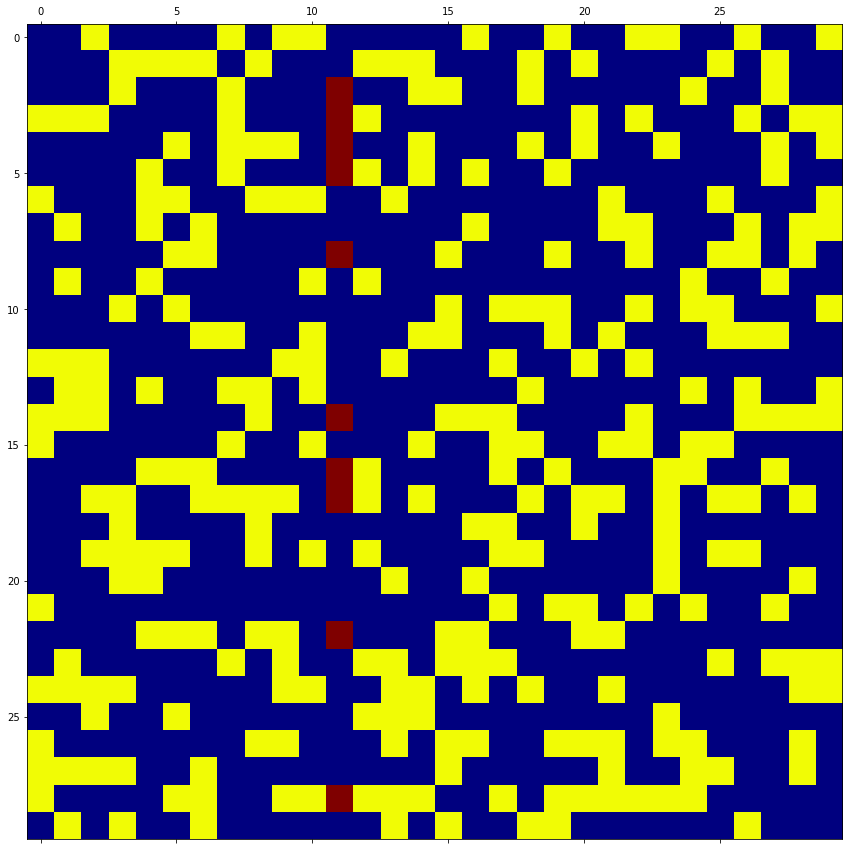

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# df_list[2]
df_list[5][ df_list[5]['path'].str.contains('s3dfm') ].groupby(['user']).size().reset_index(name='counts')
fakes_counts_train = df_list[5][ df_list[5]['path'].str.contains('deepfakes') ].groupby(['user', 'rec']).size().reset_index(name='counts')
fakes_counts_train

samples_mtx = np.zeros((30, 30), dtype=int)
np.add.at(samples_mtx, (fakes_counts_train.user.to_numpy(), fakes_counts_train.rec.to_numpy()), fakes_counts_train.counts.to_numpy()) # Label, Prediction
samples_mtx
# fakes_counts_test = df_list[10][ df_list[10]['path'].str.contains('deepfakes') ].groupby(['user']).size().reset_index(name='counts')
# fakes_counts_test

cmap='jet'
figsize=(15,15)

_ = plt.figure(num=0, figsize=figsize)    
plt.matshow(samples_mtx, cmap=cmap, fignum=0)




In [8]:
df_statistics = df_list[5].groupby(['user', 'rec']).size().reset_index(name='counts')

In [44]:
from tools.tools_visualization import read_img_cv2
import numpy as np
from pathlib import Path

root_dir=str(Path.home())

class DataframeLine:
    path='DATA/images/s3dfm/u0/r0/'
    # path='DATA/event_frames/s3dfm/AETS_40ms/u0/r0/'
    user=0
    rec=0

line = DataframeLine()
idxs=list(range(12))

clip = [read_img_cv2(os.path.join(root_dir, line.path, f'frame_u{line.user}r{line.rec}_{frameno:0>4}.png' if not 'images' in line.path else f'image{frameno:0>3}.png')) for frameno in idxs]
subclip = np.array(clip)
if subclip.ndim <= 3:
    subclip = np.expand_dims(subclip, 0)
    
subclip.shape
    
subclip = np.stack([subclip[:, i, ...] for i in range(12)], 1)
# subclip.shape
subclip[:,0,...].shape

(1, 600, 600)

In [20]:
import pandas as pd
from glob import glob
from tools.tools_basic import key_sort_by_numbers
from pathlib import Path


paths = list(map(lambda x: str(Path(x).parent), sorted(glob('DATA/images/s3dfm/u0/**/*.png', recursive=True), key=key_sort_by_numbers)))

# user = paths[0].split('/')[~1]
# rec = paths[0].split('/')[~0]
# print(user, rec)
users = list(map(lambda x: int(x.split('/')[~1][1:]), paths))
recordings = list(map(lambda x: int(x.split('/')[~0][1:]), paths))

data={
        'path':paths,
        'frameno_list':str([0,1,2,3,4,5,6,7,8,9,10,11,12]),
        'user':users,
        'rec':recordings,
        }

df = pd.DataFrame(data)
# df.to_csv('test_list_dataloader.csv', sep=',', index=False)
df = pd.read_csv('test_list_dataloader.csv')
df


,path,frameno_list,user,rec
0,DATA/images/s3dfm/u0/r0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,0
1,DATA/images/s3dfm/u0/r0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,0
2,DATA/images/s3dfm/u0/r0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,0
3,DATA/images/s3dfm/u0/r0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,0
4,DATA/images/s3dfm/u0/r0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,0
...,...,...,...,...
4995,DATA/images/s3dfm/u0/r9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,9
4996,DATA/images/s3dfm/u0/r9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,9
4997,DATA/images/s3dfm/u0/r9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,9
4998,DATA/images/s3dfm/u0/r9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,9


In [8]:
from glob import glob

path = '/mnt/DATADISK/Datasets/face/NVFSD'
path = '/mnt/DATADISK/Datasets/face/SynFED/Events'

len(glob(path+'/**/pc.csv', recursive=True))


6536

In [15]:
from nebfir.env import *
from nebfir.tools.tools_basic import multi_split, str2int_list

base_path='data/datasets/'
# events_dir = str(Path(base_path) / f"NVSFD/FixedMode/")
# events_csv_paths = sorted(glob(f"{events_dir}/**/pc.csv", recursive=True))
# events_csv_paths

# for events_csv_path in events_csv_paths:
#     user, task, rec = Path(events_csv_path).parts[~3:~0]
#     seps= string.ascii_letters
#     remove_letters = lambda x: multi_split(x, seps, map_func=str2int_list)[0]

#     user = remove_letters(user)
#     task = remove_letters(task)
#     rec = remove_letters(rec)
    
#     print(user, task, rec)

frame_rep_type='AETS_40ms'
frames_dir = str(Path(base_path) / f"NVFSD/Events/")
dir_paths = sorted(glob(os.path.join(frames_dir, '**/pc.csv'), recursive=True))
# dir_paths = sorted(glob(os.path.join(frames_dir, "user*", 'task*', "recording*"), recursive=True))
len(dir_paths)
# dir_paths

436

In [2]:
from data.inp.enums import TaskRecordingCombinations

print(TaskRecordingCombinations.A1B1.value)
print(TaskRecordingCombinations.A1.value)

{'t': [1, 2], 'r': [[1], [1]]}
{'t': [1], 'r': [[1]]}


In [13]:
from nebfir.env import *
from nebfir.tools.tools_basic import multi_split, str2int_list, separators_letters_punctuation
from data.inp.enums import TaskRecordingCombinations as TRC

combination = TRC.A1B1C123

dir_= 'data/inp/dataset/NVFSD/Clips/AETS_40ms/'

paths = sorted(glob(os.path.join(dir_, '*')))


def is_task_recording_in_combination(t,r, combination):
    matches=[]
    for i, task in enumerate(combination['t']):       
        for recording in combination['r'][i]:
            # print('t:', task, 'r:', recording)
            matches.append( (t, r) == (task, recording) )
    
    return any(matches)


for i, path in enumerate(paths):
    u, t, r = multi_split(Path(path).stem, separators=separators_letters_punctuation, map_func=str2int_list)

    print('RAW ->','u:',u,'t:',t,'r:',r)
    print('COMB ->','u:',u,'t:',combination.value['t'],'r:',combination.value['r'])
    
    match = is_task_recording_in_combination(t, r, combination=combination.value)
            
    print(match)
    
    if i ==0:
        break

RAW -> u: 0 t: 1 r: 1
COMB -> u: 0 t: [1, 2, 3] r: [[1], [1], [1, 2, 3]]
True


In [1]:
from nebfir.env import *
from nebfir.tools.tools_basic import multi_split, str2int_list, separators_letters_punctuation
from data.inp.enums import TaskRecordingCombinations as TRC

combination = TRC.ABC

df_all = pd.read_csv(f'data/inp/lists/NVFSD_df_all_events_aets40.csv', sep=';')
print('df_all shape: ', df_all.shape)
print()


def is_task_recording_in_combination(t,r, combination):
    matches=[]
    for i, task in enumerate(combination['t']):       
        for recording in combination['r'][i]:
            # print('t:', task, 'r:', recording)
            matches.append( (t, r) == (task, recording) )
    
    return any(matches)



mask_combination=[]
for i, task in enumerate(combination.value['t']):       
    for recording in combination.value['r'][i]:
        mask_combination.append( [task, recording] )

df_mask = " | ".join([f"(df_all['task'] == {t}) & (df_all['rec'] == {r})" for t, r in mask_combination])


df_all[ eval(df_mask) ]

# for i, path in enumerate(paths):
#     u, t, r = multi_split(Path(path).stem, separators=separators_letters_punctuation, map_func=str2int_list)

#     print('RAW ->','u:',u,'t:',t,'r:',r)
#     print('COMB ->','u:',u,'t:',combination.value['t'],'r:',combination.value['r'])
    
#     match = is_task_recording_in_combination(t, r, combination=combination.value)
            
#     print(match)
    
#     if i ==0:
#         break

df_all shape:  (3801, 6)



,path,frameno_list,user,task,rec,real
0,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",0,1,1,1
1,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,1,1,1
2,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0,1,1,1
3,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]",0,1,1,1
4,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]",0,1,1,1
...,...,...,...,...,...,...
3796,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[273, 274, 275, 276, 277, 278, 279, 280, 281, ...",1,1,2,1
3797,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[274, 275, 276, 277, 278, 279, 280, 281, 282, ...",1,1,2,1
3798,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[275, 276, 277, 278, 279, 280, 281, 282, 283, ...",1,1,2,1
3799,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[276, 277, 278, 279, 280, 281, 282, 283, 284, ...",1,1,2,1


In [13]:
mask_combination

[[1, 1], [2, 1], [3, 1], [3, 2], [3, 3]]

In [20]:
df_mask = " | ".join([f"(df_all['task'] == {t}) & (df_all['rec'] == {r})" for t, r in mask_combination])

df_all[ eval(df_mask) ]
# df_all[ [ (df_all['task'] == t) & (df_all['rec'] == r) for t, r in mask_combination] ]

,path,frameno_list,user,task,rec,real
0,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",0,1,1,1
1,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",0,1,1,1
2,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0,1,1,1
3,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]",0,1,1,1
4,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]",0,1,1,1
...,...,...,...,...,...,...
3518,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[686, 687, 688, 689, 690, 691, 692, 693, 694, ...",1,1,1,1
3519,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[687, 688, 689, 690, 691, 692, 693, 694, 695, ...",1,1,1,1
3520,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[688, 689, 690, 691, 692, 693, 694, 695, 696, ...",1,1,1,1
3521,data/inp/dataset/NVFSD/Clips/AETS_40ms/clip_us...,"[689, 690, 691, 692, 693, 694, 695, 696, 697, ...",1,1,1,1


In [6]:
from data.inp.enums import TaskRecordingCombinations as TRC


comb='A1B1'

TRC.assert_combination(comb)

# assert comb in TRC.__dict__.keys(), f'Combination < {comb} > does not exist!'

TRC[comb] in TRC

# [k for k in TRC.__dict__.keys() if '_' not in k]

TRC.get_available_combinations()

TRC[comb]

<TaskRecordingCombinations.A1B1: {'t': [1, 2], 'r': [[1], [1]]}>

In [ ]:
from nebfir.tools.tools_basic import separators_letters_punctuation, multi_split, str2int_list

paths = sorted(glob(os.path.join('data/inp/dataset/', f'NVFSD/Clips/AETS_40ms/*.*'), recursive=True), key=lambda x: multi_split(x, separators_letters_punctuation, str2int_list))
paths
user_task_rec_list = list(map(lambda x: multi_split( x, separators=separators_letters_punctuation, map_func=str2int_list)[~2:], paths))
user_task_rec_list

lines=[]
for i, (path, (user, task, recording)) in enumerate(zip(paths, user_task_rec_list)):
    real = 1
    lines.append([ path, user, task, recording, real])
       
lines

In [2]:
from create_lists import create_list_with_all_data_nvfsd, create_list_nvfsd

# create_list_with_all_data_nvfsd()
create_list_nvfsd(combination='A')

CREATING TRAIN AND TEST LIST ...
frametype:  FrameType.events_aets40

combination:  TaskRecordingCombinations.A
train_split_frac:  0.7

df_all shape:  (3801, 6)
df_all users, tasks, recordings ('0--1', '1--5', '1--8')

df_all_train shape:  (2662, 6)
df_all_test shape:  (1139, 6)

df_train shape:  (1424, 6)
df_test shape:  (609, 6)

df_train stats:
df_train  users, tasks, recordings ('0--1', '1--1', '1--2')
unique user shape: (2,)
unique task shape: (1,)
unique rec shape: (2,)
unique frameno_list shape: (716,)
unique path shape: (4,)

df_test stats:
df_test  users, tasks, recordings ('0--1', '1--1', '1--2')
unique user shape: (2,)
unique task shape: (1,)
unique rec shape: (2,)
unique frameno_list shape: (439,)
unique path shape: (4,)

/home/andregraca/nebfir_after/data/inp/lists/NVFSD_TRAIN_events_aets40_test-split30_S1_U0--1_combinationA.csv
Saved !
/home/andregraca/nebfir_after/data/inp/lists/NVFSD_TEST_events_aets40_test-split30_S1_U0--1_combinationA.csv
Saved !


In [ ]:
from nebfir.dataloader import EventsDataset, EventsDataloader
from nebfir.tools.tools_visualization import view_multi_frames_plt

ds = EventsDataset('data/inp/lists/TRAIN_events_aets40_test-split30_S1_Fdeepfakes_v1-s3dfm_U0--29_R0--29_realno-10_fakeno-5.csv')
# ds = EventsDataset('data/inp/lists/NVFSD_TRAIN_events_aets40_test-split30_S1_U0--1_combinationA.csv')
dl = EventsDataloader(ds, batch_size=1)

batch = next(iter(dl))
clip = batch['clip']
print(batch['label'])
print(batch['real'])
print(batch['folder'])
print(batch['task'])
view_multi_frames_plt( clip[0, ...] )


In [ ]:
from nebfir.tools.tools_path import tree

tree('data/datasets/SynFED', filter_list=['Clips', 'EventsRepresentation', 'Images'])#, length_limit=10)

In [7]:
ls configs/config-*.yml

configs/config-0.yml   configs/config-15.yml  configs/config-4.yml
configs/config-10.yml  configs/config-16.yml  configs/config-5.yml
configs/config-11.yml  configs/config-17.yml  configs/config-6.yml
configs/config-12.yml  configs/config-1.yml   configs/config-7.yml
configs/config-13.yml  configs/config-2.yml   configs/config-8.yml
configs/config-14.yml  configs/config-3.yml   configs/config-9.yml


In [4]:
echo $(nvidia-smi -q -d MEMORY | grep Used | awk '{print $3}' | awk 'NR==1')

SyntaxError: invalid syntax (529917834.py, line 1)

In [14]:
from nebfir.metrics.metrics_new import TripletLossMetrics
from nebfir.trainers.i3d_network_arch import InceptionI3d
import torch.nn as nn
import torch
import torchvision as tv


criterion = nn.TripletMarginLoss()

model = tv.models.resnet18(30)

batch = torch.randint(0,255, (30,3,224,224)) / 255.
batch.shape

out = model(batch)
out.shape
# criterion(out)



torch.Size([30, 1000])

In [60]:
from nebfir.trainers.net_enums import models, criterions, optimizers, schedulers
from typing import Dict
from enum import Enum


def get_(key: str, enum_: Enum, *args, **kwargs):
    assert key in list(enum_.__members__.keys()), f"Got an unknown {enum_.__name__} key: < {key} > . Choose from {list(enum_.__members__.keys())}"

    return enum_[key].value(*args, **kwargs)

model = get_('i3d', models, num_classes=10, in_channels=1, final_endpoint='Logits')
optimizer = get_('sgd', optimizers, params=model.parameters(), lr=1e-3, momentum=0.9)
scheduler = get_('plateau', schedulers, params=optimizer, mode="max", factor=0.75, patience=1, min_lr=1e-5)
criterion = get_('ce', criterions)




# models['i3d'].value
# models.__members__.keys()

In [69]:
import yaml
from nebfir.tools.tools_basic import dict2str

with open('nebfir/config/base_i3d_config.yml') as f:
    configuration = yaml.safe_load(f)

# print(configuration)
# print(dict2str(configuration, indentation=2))

In [123]:
from torchvision.datasets import MNIST


mnist_ds = MNIST('/mnt/DATADISK/Datasets/other', train=True)
print(mnist_ds, '\n')

print(mnist_ds.data.shape)
print(mnist_ds.targets.shape)



Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: /mnt/DATADISK/Datasets/other
    Transforms (if any): None
    Target Transforms (if any): None 

torch.Size([60000, 28, 28])
torch.Size([60000])


tensor(5)

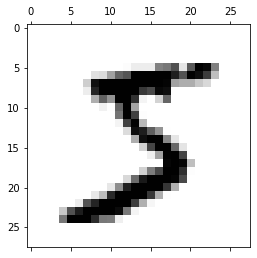

In [181]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.matshow(mnist_ds.data[0], cmap=cm.gist_gray_r)

mnist_ds.targets[0]


In [ ]:
import yaml
from glob import glob
from pathlib import Path

from nebfir.tools.tools_basic import dict2str

def load_cfg(base_file:str, filename:str):
    base_files = glob('nebfir/config/*.yml')
    assert base_file in list(map(lambda x: Path(x).name, base_files)), f'Expected base file to be one of {list(map(lambda x: Path(x).name, base_files))}. Got "{base_file}"'

    with open(f'nebfir/config/{base_file}') as f:
        cfg = yaml.safe_load(f)
    
    with open(f'configs/{filename}') as f:
        new_cfg = yaml.safe_load(f)
    
    def update_dict(old, new):
        for k, v in new.items():
            old[k] = update_dict(old.get(k, {}), v) if isinstance(v, dict) else v
        return old
    
    return update_dict(cfg, new_cfg)


print(dict2str(load_cfg('config-15.yml'), indentation=2))

In [17]:
from nebfir.config.configurations import Configurations
from nebfir.tools.tools_basic import dict2str


cfg = Configurations.load_cfg('configs/cfg.yml')
# print(dict2str(cfg, indentation=2))

def f(**kwargs):
    print([f'{k} : {v}' for k, v in kwargs.items()])
    

cfg['trainer']['criterion'].pop('name')
f(**cfg['trainer']['criterion'])

[]


In [5]:
from nebfir.env import *
from nebfir.tools.tools_path import remove_files

basedir = 'data/out/model_logs'

basename = lambda x: Path(x).stem

keep = list(map(basename , glob(f'{basedir}/*.txt')))

discard_filter = lambda x: x if not any([keep_ in Path(x).stem for keep_ in keep]) else ''
keep_filter = lambda x: x if any([keep_ in Path(x).stem for keep_ in keep]) else ''

discarded_files = sorted(filter(discard_filter , glob(f'{basedir}/*')))
keep_files = sorted(filter(keep_filter , glob(f'{basedir}/*')))

print('# of discarded_files : ', len(discarded_files))
print('# of keep_files : ', len(keep_files))

assert not all([kfile in discarded_files for kfile in keep_files]), f'Something went wrong. < discarded_files > cant contain any of the keep_files !'

discarded_files
# remove_files(discarded_files)

# of discarded_files :  7
# of keep_files :  25


['data/out/model_logs/model_2022-05-23-20-54-17',
 'data/out/model_logs/model_2022-05-23-20-55-47',
 'data/out/model_logs/model_2022-05-23-20-57-02',
 'data/out/model_logs/model_2022-05-23-21-02-18',
 'data/out/model_logs/model_2022-05-23-21-17-24',
 'data/out/model_logs/model_2022-05-23-21-17-24.log',
 'data/out/model_logs/model_2022-05-23-21-17-24_args.yml']

In [27]:
from nebfir.env import *
from nebfir.tools.tools_path import remove_files

files = ['this-file-does-not-exist', Path('other_file_that_does_not_exist'), 99]

remove_files(discarded_files)

Removing file < data/out/model_logs/model_2022-05-18_18h02m34s_CONFIG-config-0.log > with type <class 'str'>
Removing file < data/out/model_logs/model_2022-05-18_18h02m34s_CONFIG-config-0_args.yml > with type <class 'str'>
Removing file < data/out/model_logs/model_2022-05-18_18h03m00s_CONFIG-config-0.log > with type <class 'str'>
Removing file < data/out/model_logs/model_2022-05-18_18h03m00s_CONFIG-config-0_args.yml > with type <class 'str'>
Removing file < data/out/model_logs/model_2022-05-18_18h03m25s_CONFIG-config-0.log > with type <class 'str'>
Removing file < data/out/model_logs/model_2022-05-18_18h03m25s_CONFIG-config-0_args.yml > with type <class 'str'>


(2, 3, 12, 224, 224)


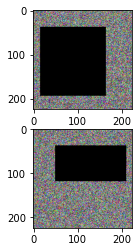

In [162]:
from nebfir.env import *

him, wim = 224,224
clip = np.random.randint(0,256, size=(2,3,12,him, wim))#.reshape(him,wim)
print(clip.shape)

prob = .5

DTYPE = np.uint8

batchno, channelno, frameno, h, w = clip.shape

newclip = np.copy(clip)
for batchno_ in range(batchno):      
    rnd = np.random.rand()

    if rnd <= prob :
        #Make box
        hbox = np.random.randint(him//10,him/1.1) # box dimensions
        wbox = np.random.randint(wim//10,wim/1.1) # box dimensions

        box = np.zeros((hbox,wbox), dtype=DTYPE)

        #Generate random coordinates
        x = np.random.randint(0,him-hbox) # box coords
        y = np.random.randint(0,wim-wbox) # box coords

        newclip[batchno_, ..., x:x + hbox, y:y + wbox] = box
   


fig, axs = plt.subplots(2)
axs[0].imshow(newclip[0,:,0,...].transpose(1,2,0))#, cmap='gray')
axs[1].imshow(newclip[1,:,0,...].transpose(1,2,0))#, cmap='gray')

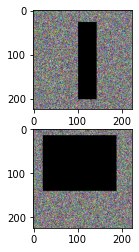

In [31]:
from nebfir.env import *
from nebfir.imop.transformations import random_erase_box

clip = np.random.randint(0,256, size=(2,3,12,224, 224))#.reshape(him,wim)

prob = .99


newclip = random_erase_box(clip, prob)


fig, axs = plt.subplots(2)
axs[0].imshow(newclip[0,:,0,...].transpose(1,2,0))#, cmap='gray')
axs[1].imshow(newclip[1,:,0,...].transpose(1,2,0))#, cmap='gray')

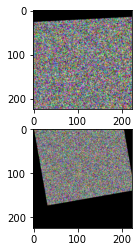

In [110]:
from nebfir.env import *
DTYPE=np.uint8

def affine(clip, angle, scale, deltax, deltay):
    
    batchno = clip.shape[0]
    channelno = clip.shape[1]
    frameno = clip.shape[2]
    h = clip.shape[3]
    w = clip.shape[4]
    
    newclip = np.zeros_like(clip, dtype=DTYPE)
    
    for batchno_ in range(batchno):
        ang = int(random.uniform(-angle, angle))
        scl = random.uniform(scale, 1+(scale))
        dx = int(random.uniform(-deltax, deltax))
        dy = int(random.uniform(-deltay, deltay))
        
        M = cv2.getRotationMatrix2D((w//2, h//2), ang, scl) # Rotation
        M[:, ~0] += np.array([dx, dy]) # Translation
        
        # Apply mtx
        for channelno_ in range(channelno):
            for frameno_ in range(frameno):
                img = clip[batchno_, channelno_, frameno_, :, :]
                img = cv2.warpAffine(img, M, (w, h))
                newclip[batchno_, channelno_, frameno_, :, :] = img

    return newclip



clip = np.random.randint(0,256, size=(2,3,12,224, 224)).astype(DTYPE)#.reshape(him,wim)

angle, scale, deltax, deltay = 20, 0.5, 100, 100
newclip = affine(clip, angle, scale, deltax, deltay)


fig, axs = plt.subplots(2)
axs[0].imshow(newclip[0,:,0,...].transpose(1,2,0))#, cmap='gray')
axs[1].imshow(newclip[1,:,0,...].transpose(1,2,0))#, cmap='gray')

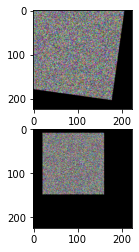

In [10]:
from nebfir.env import *
from nebfir.imop.transformations import affine
DTYPE=np.uint8

angle, scale, deltax, deltay = 20, 0.5, 50, 50

clip = np.random.randint(0,256, size=(2,3,12,224, 224)).astype(DTYPE)#.reshape(him,wim)

newclip = affine(clip, angle, scale, deltax, deltay)


fig, axs = plt.subplots(2)
axs[0].imshow(newclip[0,:,0,...].transpose(1,2,0))#, cmap='gray')
axs[1].imshow(newclip[1,:,0,...].transpose(1,2,0))#, cmap='gray')

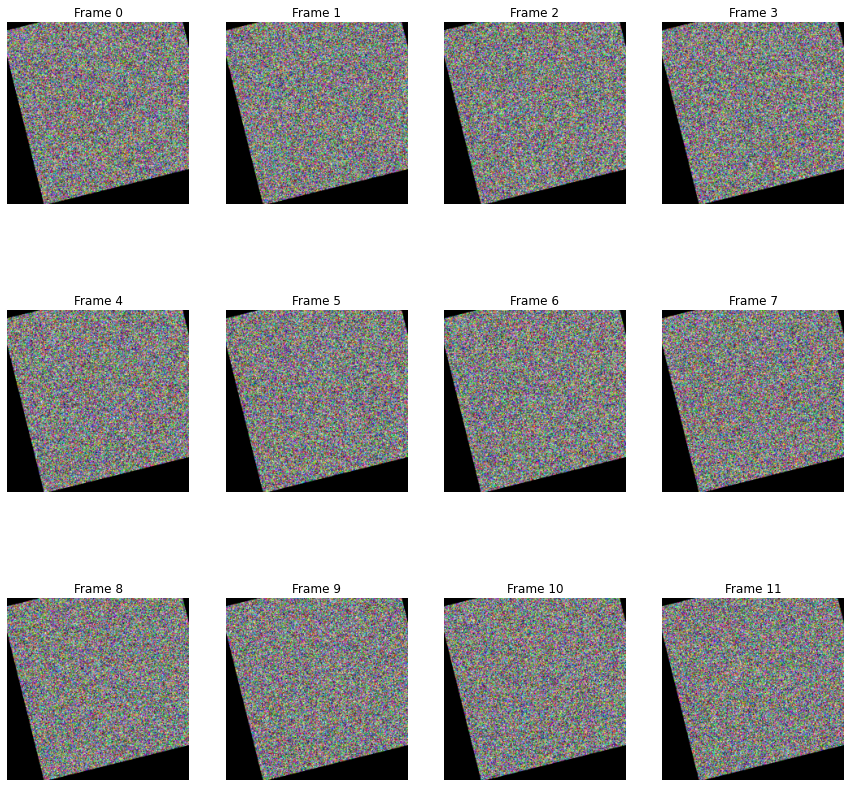

False

In [52]:
from nebfir.env import *
from nebfir.tools.tools_visualization import view_multi_frames_plt
from nebfir.model.net_enums import Augmentations, AugmentationsDefaults
DTYPE=np.uint8

clip = np.random.randint(0,256, size=(2,3,12,224, 224)).astype(DTYPE)#.reshape(him,wim)

tf_list = ['rnd_erase', 'affine']

for tf in tf_list:
    clip = Augmentations[tf].value(clip , **AugmentationsDefaults[tf].value)

clip = Augmentations.normalize(clip)

view_multi_frames_plt(clip[0])
# fig, axs = plt.subplots(2)
# axs[0].imshow(newclip[0,:,0,...].transpose(1,2,0))#, cmap='gray')
# axs[1].imshow(newclip[1,:,0,...].transpose(1,2,0))#, cmap='gray')

In [29]:
from nebfir.model.net_enums import Augmentations

Augmentations.normalize(255)

1.003921568627451

In [25]:
from nebfir.env import * 
from nebfir.config.configurations import Configurations

cfg=Configurations.load_cfg('configs/config-13.yml')
# Configurations.load_cfg('configs/tsf_cfg.yml')

cfg['data']['lists']


{'train': '/home/andregraca/NebFIR/data/inp/lists/SynFED_TRAIN_events_aets40_test-split30_S1_Fs3dfm_U0--29_R0--9_realno-10_fakeno-5.csv',
 'test': '/home/andregraca/NebFIR/data/inp/lists/SynFED_TEST_events_aets40_test-split30_S1_Fs3dfm_U0--29_R0--9.csv'}

In [22]:
from nebfir.tools.tools_basic import separators_letters_punctuation, str2int_list, multi_split

existing_configs = list(map(lambda x: multi_split(x, separators_letters_punctuation, map_func=str2int_list), glob('configs/config-*.yml')))

if not existing_configs:
    name = f'config-0.yml'
else:
    val = max( existing_configs )[0] + 1
    name = f'config-{val}.yml'

print( existing_configs,  val, name )

[[0]] 1 config-1.yml


In [ ]:
from nebfir.model.triplet_loss import get_triplet_mask
from nebfir.env import *
import torch

get_triplet_mask(torch.tensor([0,3,1,1]))



In [ ]:
from nebfir.config.configurations import Configurations

Configurations.load_multiple_cfg([ 'configs/config-0.yml', 'configs/tsf_cfg.yml' , 'configs/triplet_cfg.yml', ])

In [112]:
names=['Marco ATD', 
'Daniel SA', 
'Mariana MLD Bento', 
'Afonso E Carvalho', 
'M Eduarda Andrada', 
'João MBC Santos', 
'Ana MPC Tavares', 
'João BPMG Campos', 
'José GRTR Martins', 
'Fernanda Famá', 
'João PC Castilho', 
'Bernardo HP Fernandes', 
'António JB Silva', 
'Hugo C Marques', 
'Afonso MLPP Marques', 
'Rui JSO Nunes', 
'Tiago B Novo', 
'Pedro P Dinis', 
'João CA Jorge', 
'Mario JP Cristovao', 
'Miguel SM Tiago', 
'Leonardo G Esteves', 
'Manuel R Carneiro', 
'André P Graça', 
'Frederico C Vaz', 
'João PM Santos', 
'Eurico M Almeida', 
'José Alberto', 
'Tiago JG Pimentel', 
'Micael A Pires', 
'José MC Simões', ]

import pandas as pd
df=pd.DataFrame(names, columns=['name'])
df['counts'] = 0

samples=1
for _ in range(samples):
    df.loc[df.sample().name.index, 'counts'] += 1
    
# df['counts'] = df.counts / samples
df.sort_values(by=['counts'], ascending=False)

# df['counts'].sum()

,name,counts
12,António JB Silva,1
0,Marco ATD,0
16,Tiago B Novo,0
29,Micael A Pires,0
28,Tiago JG Pimentel,0
27,José Alberto,0
26,Eurico M Almeida,0
25,João PM Santos,0
24,Frederico C Vaz,0
23,André P Graça,0


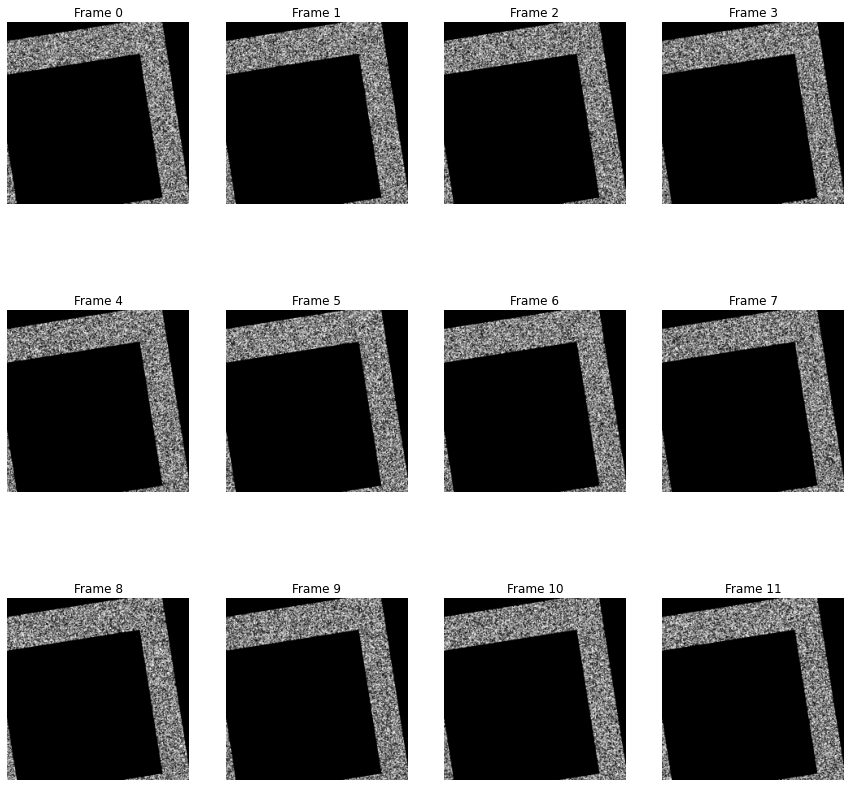

False

In [3]:
from nebfir.env import *
from nebfir.dataloader.transforms import affine, rnd_erase, normalize
from nebfir.tools.tools_visualization import view_multi_frames_plt

from torchvision.transforms import Compose

clip = np.random.randint(0,256, size=(1,12,224, 224)).astype(UINT8)#.reshape(him,wim)
# clip = np.random.randint(0,256, size=(2,3,12,224, 224)).astype(UINT8)#.reshape(him,wim)



tforms = Compose([rnd_erase(), affine(), normalize()])

clip = tforms(clip)

# view_multi_frames_plt(clip)
view_multi_frames_plt(clip[0] if clip.ndim == 5 else clip)



In [118]:
import matplotlib.pyplot as plt
import numpy as np

def plot_x(xp, xn, is_real):
    print(f'a={a} b={b} c={c} ')
    print(f'x={xp:.4f} or x={xn:.4f}')

    (x1,y1),(x2,y2) = ((xp,0),(xn,0)) if is_real else ((xp.real,xp.imag),(xn.real,xn.imag))

    plt.figure(figsize=(4,)*2)
    plt.plot(x1, y1, 'ro')
    plt.plot(x2, y2, 'bo')


def fr(a,b,c, plot=False):
    sqrt = lambda x: x**.5
    is_real = lambda a_,b_,c_: (b_**2 - 4*a_*c_) > 0

    assert is_real(a,b,c), '(b² - 4ac) must be > 0'
    sqrt_term = sqrt(b**2 - 4*a*c)

    bottom_term = 2*a
    assert bottom_term != 0, 'Bottom term must be != 0'

    top_pos_term = -b + sqrt_term
    top_neg_term = -b - sqrt_term

    xp = top_pos_term / bottom_term
    xn = top_neg_term / bottom_term

    if plot: plot_x(xp, xn, is_real(a,b,c))

    return xp, xn

a,b,c = np.random.randint(-10,10,(3,))
fr(a,b,c, plot=True)

    


AssertionError: (b² - 4ac) must be > 0

left_dict:  {'': -14.0, 'x^2': 1.0, 'x': -5.0} = 0

a=1.0 b=-5.0 c=-14.0 
b² - 4ac > 0 : True
x=7.0000 or x=-2.0000


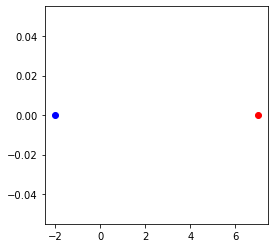

In [45]:
from nebfir.tools.tools_basic import multi_split

# formula='-1*x^2+3*x-16/x-3=-1+2*x+4*x^2' #  
# formula='+1*x+9*x^2-16/x-3=-1'
formula='+1*x^2=+11*x-28'
formula='+1*x^2+15*x=-50'
formula='+1*x^2-5*x-14=0'

raw_left_terms, raw_right_terms = multi_split(formula, '=')

num_left_terms = multi_split(raw_left_terms, '+-')
num_right_terms = multi_split(raw_right_terms, '+-')

left_signs = multi_split(raw_left_terms, 'x0123456789*/^')
right_signs = multi_split(raw_right_terms, 'x0123456789*/^')

left_items = [multi_split(num, ['*']) for num in num_left_terms]
right_items = [multi_split(num, ['*']) for num in num_right_terms]

def get_vars(signs, items):
    variables = {'':0}
    for sign, item in zip(signs, items):
        # print(sign, item)
        
        val = item[0]
        var = item[1] if len(item)>1 else ''
        
        if '/' in val:
            raw_items=multi_split(val, '/x')
            if len(raw_items)>1:
                val=float(sign+raw_items[0]/raw_items[1])**-1
            else:
                val=float(sign+raw_items[0])**-1
            var='x'
        else:
            val=float(sign+item[0])

        # print(val, var)

        if var in variables:
            variables[var]+=val ; continue
        variables[var]=val ; continue
    
    return variables


def update_left_dict(left_dict, right_dict):
    joint_keys = set(list(left_dict.keys()) + list(right_dict.keys()))

    needed_keys=set(['', 'x^2', 'x'])
    if joint_keys != needed_keys:
        missing_keys = needed_keys - joint_keys
        for k in missing_keys:
            left_dict[k]=0

    for k in joint_keys:
        if k in left_dict and k in right_dict :
            left_dict[k] = left_dict[k] - right_dict[k]
        elif k in right_dict:
            left_dict[k] = -right_dict[k]



left_dict = get_vars(left_signs, left_items)
right_dict = get_vars(right_signs, right_items)

# print('left_dict',left_dict)
# print('right_dict',right_dict)
       
update_left_dict(left_dict, right_dict)
print('left_dict: ', left_dict, '= 0\n')

a,b,c = left_dict['x^2'], left_dict['x'], left_dict['']

a,b,c

_ = fr(a,b,c)

    

1*x^2 + 0*x + 15.0 = 0
a=1 b=0 c=15.0 
x=0.0000+3.8730j or x=-0.0000-3.8730j


((2.3715183290419594e-16+3.872983346207417j),
 (-2.3715183290419594e-16-3.872983346207417j))

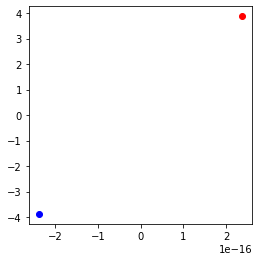

In [34]:
from nebfir.tools.tools_basic import multi_split, separators_numbers_punctuation
import matplotlib.pyplot as plt
import numpy as np

def plot_x(xp, xn, is_real):
    print(f'a={a} b={b} c={c} ')
    print(f'x={xp:.4f} or x={xn:.4f}')

    (x1,y1),(x2,y2) = ((xp,0),(xn,0)) if is_real else ((xp.real,xp.imag),(xn.real,xn.imag))

    plt.figure(figsize=(4,)*2)
    plt.plot(x1, y1, 'ro')
    plt.plot(x2, y2, 'bo')

def fr(a,b,c, plot=False, force_real=False):
    sqrt = lambda x: x**.5
    is_real = lambda a_,b_,c_: (b_**2 - 4*a_*c_) >= 0

    if force_real:
        assert is_real(a,b,c), '(b² - 4ac) must be > 0'
    sqrt_term = sqrt(b**2 - 4*a*c)

    bottom_term = 2*a
    assert bottom_term != 0, 'Bottom term must be != 0'

    top_pos_term = -b + sqrt_term
    top_neg_term = -b - sqrt_term

    xp = top_pos_term / bottom_term
    xn = top_neg_term / bottom_term

    if plot: plot_x(xp, xn, is_real(a,b,c))

    return xp, xn

def get_terms_signs(formula):
    var=set(multi_split(formula, separators_numbers_punctuation)).pop()
    num_left_terms = len(multi_split(multi_split(formula, '=')[0], '+-'))

    terms = multi_split(formula, '+-=')
    signs = multi_split(formula, terms+['='])

    return terms, signs, var, num_left_terms

def get_var_val(term):
    items=term.split('*')

    try: 
        val = float(items[0])
        var = items[1]
    except ValueError: # only var
        val = 1
        var = items[0]
    except IndexError: # no var
        var = '' 
    
    return var, val
    
def normalize_signs(signs, num_left_terms):
    invert = lambda sign : '+' if sign == '-' else '-'
    new_signs = list(map(invert, signs[num_left_terms:]))
    return signs[:num_left_terms] + new_signs

def deal_with_parenthesis(term):
    return 'TODO'

def deal_with_division(term):
    return 'TODO'
    items = term.split('/')
    top=items[0]
    bot=items[1]

    if 'x' in top:
        it=top.split('*')[0]
        if it in ['x']+[f'x^{n}' for n in range(2,10)]:
            var=it
            it = 1
        else:
            var=top.split('*')[1]
        res = float(it)/float(bot)
    elif 'x' in bot:
        it=bot.split('*')[0]
        var=it
        if it in ['x']+[f'x^{n}' for n in range(2,10)]:
            var=it
            it = 1
        else:
            var=bot.split('*')[1]
        res = (float(top)/float(it))**(-1)
        # res = (float(top)/float(it))**(-1)

    # print(top, bot, res, var)
    return res, var, top, bot

def simplify_formula(terms, new_signs, var):
    calculated_vars = {}
    for s, (k, v) in zip(new_signs, [get_var_val(term) for term in terms]):
        if not k in calculated_vars:
            calculated_vars[k] = int(f'{s}1')*v; continue
        
        calculated_vars[k] += int(f'{s}1')*v

    needed_keys=set([f'{var}^2', f'{var}', ''])
    if calculated_vars.keys() != needed_keys:
        missing_keys = needed_keys - calculated_vars.keys()
        for k in missing_keys:
            calculated_vars[k]=0

    return calculated_vars

def print_simplified_formula(terms_dict):
    str_=''
    for term, value in sorted(terms_dict.items(), reverse=True):
        str_+=f'{value}{"*" if term != "" else ""}{term} + '
    str_ = str_[:~2]
    str_+=' = 0'
    print(str_)

# deal_with_division('-3/x')
# deal_with_parenthesis('-(-3+x)')

formula='-16*z+61=+2*z-20' 
formula='+z^2-16*z+61=+2*z-20'
formula='+12*x^2=+25*x'
formula='+6*w^2-w=+5'
formula='+x^2+15=0'

terms, signs, var, num_left_terms = get_terms_signs(formula)
new_signs = normalize_signs(signs, num_left_terms)
simplified_terms_dict = simplify_formula(terms, new_signs, var)

print_simplified_formula(simplified_terms_dict)

a,b,c=simplified_terms_dict[f'{var}^2'], simplified_terms_dict[var], simplified_terms_dict['']

fr(a,b,c, plot=True)

In [32]:
25/12
-5/6


-0.8333333333333334

In [265]:
x=1
-3/(1*x) == (-1/3)**-1*x

True

In [1]:
xn={i:(lambda i_: lambda x: x**i_)(i) for i in range(10)}

xn[0](3)
xn[1](3)
xn[2](3)
xn[3](3)

27

In [1]:
from enum import Enum


class class1: pass
class class2: pass
class class3: pass

class models(Enum):
    name1 = class1
    name2 = class2

models._value2member_map_.items()
# list(models._value2member_map_.keys())


models.__members__['name3'] = class3

# models.name1.value
# models.name3

models.__members__.items()


# models.name3

TypeError: 'mappingproxy' object does not support item assignment

In [17]:
from nebfir.model.i3d_network_arch import InceptionI3d
from enum import Enum

available_models=[InceptionI3d]

try:
    from mvit.models.mvit_model import MViT
    available_models.append(MVit)
except ImportError:
    print(f'Package: mvit not installed ! Please check https://github.com/facebookresearch/mvit github page to install package')



try:
    from timesformer.models.vit import TimeSformer    
    available_models.append(TimeSformer)
except ImportError:
    print(f'Package: timesformer not installed ! Please check https://github.com/facebookresearch/TimeSformer github page to install package')


models = Enum('models', dict(zip(list(map(lambda m: m.__name__, available_models)), available_models)))
models.MViT


Package: mvit not installed ! Please check https://github.com/facebookresearch/mvit github page to install package


AttributeError: MViT

In [12]:
from nebfir.trainers.files import Files
from nebfir.env import *
from nebfir.trainers.files_manager import NetConfig
from nebfir.config.options import get_jupyter_args

# date = datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
date='2022-06-05-01-53-55'
args= get_jupyter_args()
files=Files(date, NetConfig(args.configuration, args))
t1 = files.test_file
Path(t1).touch()
print(t1, files.test_file)

/home/andregraca/NebFIR/data/runs/model_2022-06-05-01-53-55/model_2022-06-05-01-53-55.json /home/andregraca/NebFIR/data/runs/model_2022-06-05-01-53-55/model_2022-06-05-01-53-55_.json


In [9]:
from torch.utils.tensorboard import SummaryWriter

tb=SummaryWriter(f'./data/runs/test_run')
# tb=SummaryWriter(f'./data/runs/{files.MODEL_NAME}')
tb.add_scalar('accuracy/train', .99, 1)
tb.add_scalar('accuracy/train', .34, 2)
tb.add_scalar('accuracy/train', .12, 3)
tb.add_scalar('accuracy/train', .455,4 )
tb.add_scalar('accuracy/train', .23, 5)
tb.add_scalar('accuracy/train', .56, 6)


tb.add_hparams({'net':"i3d", 'criterion':'ce', 'optimizer':'sgd', 'scheduler':'multi_step', "lr": .001, "batchsize": 32, 'pretrain':'none'}, {"accuracy/test": .5412, "loss/test": .0001, }, run_name='hparams')

# f'./data/runs/{files.MODEL_NAME}'

# files.run_dir

In [15]:
from nebfir.model.i3d_network_arch import InceptionI3d
import torch
from collections import OrderedDict

model_path='data/out/weights/model_2022-05-30-08-36-22.pth'
model_sd=torch.load(model_path, map_location='cpu')

new_model_sd = OrderedDict()
for k,v in model_sd.items():
    new_model_sd[k.replace('module.', '')] = v

del model_sd

# print(new_model_sd.keys())

params={
'num_classes': 30,
'in_channels': 1,
'final_endpoint': 'Logits',
}
model = InceptionI3d(**params)
# model.load_state_dict(new_model_sd, strict=True)
print()

In [22]:
from nebfir.trainers.build_trainer import Tracker

loss_tracker = Tracker(track_highest=False, highest=1e10)
acc_tracker = Tracker(track_highest=True)
loss_tracker(9)
loss_tracker(10)
loss_tracker
acc_tracker(.5)
acc_tracker(.6)
acc_tracker(.4)
acc_tracker
# print('loss_tracker', loss_tracker)

Tracking highest value
LOWEST <= BEST <= HIGHEST
0.0 <= 0.6 <= 1.0

In [5]:
from nebfir.trainers.build_trainer import Weights
from copy import deepcopy
from torchvision.models.resnet import resnet18
from nebfir.model.i3d_network_arch import InceptionI3d
from pathlib import Path

def compare_weights(model1, model2):
    for p1, p2 in zip(model1.parameters(), model2.parameters()):
        if p1.data.ne(p2.data).sum() > 0:
            return False
    return True

model = InceptionI3d(30, in_channels=1)
# model = resnet18()
model_back=deepcopy(model)
model_back2=deepcopy(model_back)

weights = Weights()
weights.load('data/runs/model_2022-06-02-11-06-12 copy/model_2022-06-02-11-06-12_minvalloss_ep84.pth', model, 'cpu')
weights.save(0.5, .7, model, run_dir= 'data/runs', model_name='dry')

print(compare_weights(model, model_back))
print(compare_weights(model_back2, model_back))

weights

False
True


Loss tracker -> Tracking lowest value
LOWEST <= BEST <= HIGHEST
0.0 <= 0.5 <= 100000.0

Accuracy tracker -> Tracking highest value
LOWEST <= BEST <= HIGHEST
0.0 <= 0.7 <= 1.0


In [1]:
import torch



loss = torch.nn.CrossEntropyLoss()#.to('cuda')

loss = torch.nn.DataParallel(loss)

loss.device_ids
# loss(torch.tensor(1),torch.tensor(.5))

[0, 1]

In [16]:
import torch 
from nebfir.dataloader.dataloader import EventsDataloader, EventsDataset, EventsDatasetV2

ds1 = EventsDataset('data/inp/lists/SynFED_TRAIN_events_aets40_test-split30_S1_Fdeepfakes_v1-s3dfm_U0--29_R0--29_realno-10_fakeno-5.csv')
print(ds1)
dl1 = EventsDataloader(ds1, shuffle=False)

# a = torch.rand(32,1,12,224,224)
# a.shape

ds2=EventsDatasetV2(csv_file='data/inp/lists/SynFED_df_all_events_aets40.csv', userno=30, fakeno=5, recno=10, transform=None, split='train', train_split_frac=.7, authentics=True, impostors=True, rand_state=0)
print(ds2)

dl2 = EventsDataloader(ds2, shuffle=False)

labels1 = next(iter(dl1))['label']
labels2 = next(iter(dl2))['label']

labels1==labels2

Events Dataset
  csv file: data/inp/lists/SynFED_TRAIN_events_aets40_test-split30_S1_Fdeepfakes_v1-s3dfm_U0--29_R0--29_realno-10_fakeno-5.csv
  user number: 30
  user mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29}
  dataset length: 4042
Events Dataset
  csv file: data/inp/lists/SynFED_df_all_events_aets40.csv

  userno: 30
  fakeno: 5
  recno: 10
  user mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29}

  split: train
  split_frac: 0.7

  authentics: True
  impostors: True

  rand_state: 0
  
  dataset length: 4042



tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])

In [19]:

class class1:
    def __init__(self):
        self.fakeno=5

    def update_from(self, clss):
        """ Updates class attributes

        IMPORTANT NOTE: only class attributes are used for the class update. Also, must initialize clss to use class attributes not defined directly inside the class

        Args:
            clss (_type_): _description_
        """
        clss_dict = dict(filter(lambda x: x if not '__' in x[0] else None, clss.__dict__.items()))
        [setattr(self, k, v) for k,v in clss_dict.items()]


class class2:
    batchsize=32
    userno=30
    
class class3:
    batchsize=8
    def __init__(self):
        class3.fakeno = 10
        self.userno = 20

class3()

    

cls1 = class1()

print(cls1.__dict__)

cls1.update_from(class2)
print(cls1.__dict__)

cls1.update_from(class3)
print(cls1.__dict__)



{'fakeno': 5}
{'fakeno': 5, 'batchsize': 32, 'userno': 30}
{'fakeno': 10, 'batchsize': 8, 'userno': 30}


In [3]:
from nebfir.trainers.build_trainer import NetParams
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('-c', "--cfg", "--conf", "--config", "--configuration", nargs='+', type=str, dest='configuration', required=True, action='store', help="Configuration file")
args = parser.parse_args('-c configs/config-0.yml'.split())
args = parser.parse_args('-c configs/config-0.yml configs/base_timesformer.yml'.split())

class someClass:
    def __init__(self):
        self.userno=10
    def update_attributes_from(self, clss):
        """ Updates class attributes

        IMPORTANT NOTE: only instance attributes are used for the class update. 

        Args:
            clss (class): Initialized class
        """
        clss_dict = dict(filter(lambda x: x if not '__' in x[0] else None, clss.__dict__.items()))
        [setattr(self, k, v) for k,v in clss_dict.items()]


net_params = NetParams(args)

clss = someClass()
print(clss.__dict__)
clss.update_attributes_from(net_params)

print(clss.__dict__)
# someClass.__dict__

{'userno': 10}
{'userno': 30, 'cfg': ['configs/config-0.yml', 'configs/base_timesformer.yml'], 'architecture_key': 'TimeSformer', 'architecture_args_dict': {'num_classes': 30, 'in_chans': 1, 'num_frames': 12, 'attention_type': 'divided_space_time', 'pretrained_model': '/home/andregraca/TimeSformer/models/TimeSformer_divST_8x32_224_K600.pyth'}, 'criterion_key': 'ce', 'criterion_args_dict': {}, 'optimizer_key': 'sgd', 'optimizer_args_dict': {'lr': 0.005, 'momentum': 0.9, 'weight_decay': 0.0001}, 'scheduler_key': 'multi_step', 'scheduler_args_dict': {'milestones': [30, 60], 'gamma': 0.1}, 'epochs': 100, 'batch_size': 16, 'device': 'cuda:0', 'data_parallel': False, 'transform_list': ['rnd_erase', 'affine'], 'workers': 8, 'pin_memory': True, 'recno': 10, 'fakeno': 15, 'impostors': True, 'authentics': True}


In [1]:

from nebfir.trainersV2.weights import Weights
from nebfir.trainersV2.files import Files
from nebfir.model.net_builder import NetV2
from nebfir.trainersV2.trainer_params import TrainerParams
from nebfir.trainersV2.trainer import Trainer
from nebfir.config.options import get_jupyter_args
from nebfir.env import *





args = get_jupyter_args('--cfg configs/config-0.yml --device cpu')
trainer = Trainer(args)

trainer.__dict__


/home/andregraca/NebFIR/nebfir/model/net_enums.py:22: UserWarning: Package: mvit not installed ! Please check https://github.com/facebookresearch/mvit github page to install package
  warnings.warn(f'Package: mvit not installed ! Please check https://github.com/facebookresearch/mvit github page to install package')


{'date': '2022-06-08-17-51-34',
 'cfg': ['configs/config-0.yml'],
 'seed': 0,
 'userno': 30,
 'description': 'Train the model on the SynFED dataset. ',
 'train_list_name': '/home/andregraca/NebFIR/data/inp/lists/SynFED_TRAIN_events_aets40_test-split30_S1_Fdeepfakes_v1-s3dfm_U0--29_R0--29_realno-10_fakeno-2.csv',
 'test_list_name': '/home/andregraca/NebFIR/data/inp/lists/SynFED_TEST_events_aets40_test-split30_S1_Fdeepfakes_v1-s3dfm_U0--29_R0--29.csv',
 'device': 'cpu',
 'data_parallel': False,
 'weights_path': '_NO_WEIGHTS_',
 'num_channels': 1,
 'architecture_key': 'InceptionI3d',
 'architecture_args_dict': {'num_classes': 30,
  'in_channels': 1,
  'final_endpoint': 'Logits'},
 'criterion_key': 'ce',
 'criterion_args_dict': {},
 'optimizer_key': 'sgd',
 'optimizer_args_dict': {'lr': 0.01, 'momentum': 0.9},
 'scheduler_key': 'plateau',
 'scheduler_args_dict': {'mode': 'max',
  'factor': 0.75,
  'patience': 1,
  'min_lr': 1e-08},
 'epochs': 100,
 'batch_size': 128,
 'transforms_list': ['

In [32]:
from nebfir.tools.tools_basic import GroupAsDict, GroupAsList


class Sum:
    def __init__(self, a,b):
        self.a = a
        self.b = b

    def sum_vals(self, extra1, extra2=0):
        return self.a + self.b + extra1 + extra2



sum1 = Sum(1,2)
sum2 = Sum(3,4)
sum3 = Sum(5,6)


group = GroupAsList(sum1,sum3)
# group = GroupAsDict(dict(zip(['sum1','sum2'], [sum1,sum2])), sum3=sum3)
# group = GroupAsDict(dict(zip(['sum1','sum2'], [sum1,sum2])))
# group = GroupAsList(sum1, sum2)

group.apply('sum_vals', 2, extra2=5)

# method_list = [func for func in dir(Sum) if callable(getattr(Sum, func)) and not func.startswith("__")]
# method_list

# getattr(Sum, 'sum_vals')

[10, 18]

In [2]:
from nebfir.tools.tools_basic import GroupAsDict, GroupAsList
from nebfir.trainersV2.net import get_
from nebfir.model.net_enums import models, criterions
import torch


model     =  get_('InceptionI3d',  models, num_classes=30, in_channels=1, final_endpoint='Logits')
criterion =  get_('ce', criterions)

net_group = GroupAsDict(model=model, criterion=criterion)
# net_group.apply(torch.nn.DataParallel)
# net_group.apply(print)

# print(type(torch.nn.DataParallel))
# print(type(GroupAsList))

In [2]:
import numpy as np

clip=np.load('data/datasets/NVFSD/Clips/AETS_40ms/clip_user000task01recording02.npy')

clip.shape

(1, 307, 224, 224)